# Final Model : XGBOOST
---


# LOS TRES TENSORES
- Pedro Dimas Martínez
- Juan Contell Husillos
- Rafael Domenech Serrano

---

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
import numpy as np
np.random.seed(989)

url = "hunger_data.csv"
dataframe = pd.read_csv(url, header=0)
dataframe.drop("Unnamed: 0", axis=1, inplace=True)
dataframe.columns = ["refractive_index", "sodium", "magnesium", "aluminum", "silicon", "potassium", "calcium", "barium", "iron", "type_of_glass"]

X = dataframe.drop(columns="type_of_glass") #Features
y = dataframe["type_of_glass"] #Target

X_train, X_test, y_train, y_test = train_test_split(X, y)

# This model does not require normalisation
# from sklearn.preprocessing import StandardScaler
# from sklearn.preprocessing import MinMaxScaler
# sc = StandardScaler()
# X_train = sc.fit_transform(X_train)
# X_test = sc.transform(X_test)


# The Model
---

[0]	validation_0-mlogloss:1.36099	validation_0-merror:0.16092	validation_1-mlogloss:1.49301	validation_1-merror:0.36667
Multiple eval metrics have been passed: 'validation_1-merror' will be used for early stopping.

Will train until validation_1-merror hasn't improved in 10 rounds.
[1]	validation_0-mlogloss:1.09525	validation_0-merror:0.16092	validation_1-mlogloss:1.32730	validation_1-merror:0.33333
[2]	validation_0-mlogloss:0.91087	validation_0-merror:0.12644	validation_1-mlogloss:1.23523	validation_1-merror:0.36667
[3]	validation_0-mlogloss:0.75716	validation_0-merror:0.06897	validation_1-mlogloss:1.12248	validation_1-merror:0.36667
[4]	validation_0-mlogloss:0.63392	validation_0-merror:0.03448	validation_1-mlogloss:1.01621	validation_1-merror:0.33333
[5]	validation_0-mlogloss:0.54191	validation_0-merror:0.02299	validation_1-mlogloss:0.92790	validation_1-merror:0.30000
[6]	validation_0-mlogloss:0.46341	validation_0-merror:0.02299	validation_1-mlogloss:0.88347	validation_1-merror:0.333

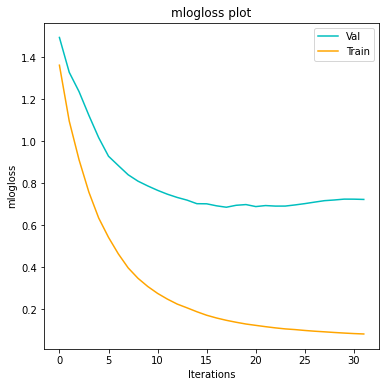

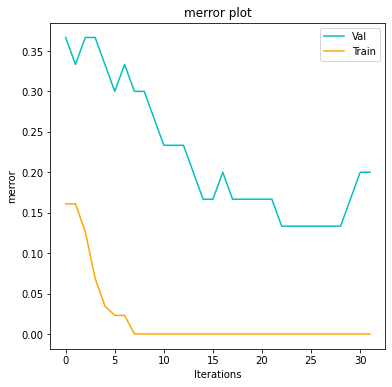

                [ XGBOOST ]
Default score: ----------------------------------------------------------------------
 Train: 1.000
 Test: 0.867
Other scores: ----------------------------------------------------------------------
 Accuracy  : 0.867
             [1 2 3 5 6 7]
 Precision : [0.8 0.8 1.  1.  1.  1. ]
 Recall    : [1.         0.8        0.66666667 1.         0.66666667 1.        ]
 F1        : [0.88888889 0.8        0.8        1.         0.8        1.        ]
 F1 micro  : 0.867
 F1 macro  : 0.881
 Balanced accuracy: 0.856
-------------------------------------------------------------------------------------
              precision    recall  f1-score   support

           1       0.80      1.00      0.89         8
           2       0.80      0.80      0.80        10
           3       1.00      0.67      0.80         3
           5       1.00      1.00      1.00         1
           6       1.00      0.67      0.80         3
           7       1.00      1.00      1.00         

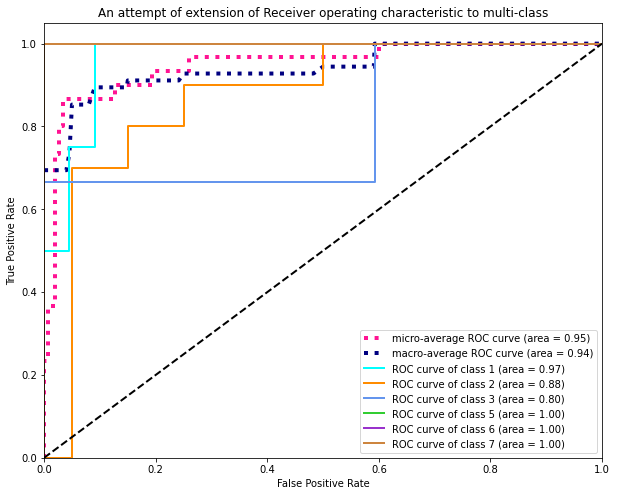

In [3]:
from xgboost.sklearn import XGBClassifier

model_xgb = XGBClassifier(objective='multi:softmax',
                     num_class=6,
                     max_depth=4,
                     gamma = 1e-06,
                     random_state=989)

model_xgb.fit(X_train, y_train,
         eval_set=[(X_train, y_train), (X_test, y_test)],
         eval_metric=['mlogloss','merror'],
         verbose=True,
         early_stopping_rounds=10)
plot_eval(['mlogloss','merror'],model_xgb.evals_result())
print_scores(model_xgb, X_train, X_test, y_train, y_test, '[ XGBOOST ]')
plot_roc(model_xgb, X_test, y_test)

# Model release
---

In [4]:
import pickle

pickl = {'info' : " XGBOOST Classifier\n" +
                  " - Usage: install xgboost package and use with sklearn api:\n"
                  "      from xgboost.sklearn import XGBClassifier\n"
                  " - This model does not require any standarisation.\n" + 
                  " - Trained with " + str(X_train.shape[0]) + " samples\n" +
                  " - Tested with " + str(X_test.shape[0]) + " samples\n",
        'model': model_xgb}
pickle.dump(pickl, open('hg_los_tres_tensores'+'.p','wb'))


In [5]:
#Verify pickle
file_name = 'hg_los_tres_tensores.p'
with open(file_name,'rb') as pickled:
    data = pickle.load(pickled)
    infop =  data['info']
    modelp = data['model']
print(infop)
print(modelp)

 XGBOOST Classifier
 - Usage: install xgboost package and use with sklearn api:
      from xgboost.sklearn import XGBClassifier
 - This model does not require any standarisation.
 - Trained with 87 samples
 - Tested with 30 samples

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=1e-06, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=4,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_class=6, num_parallel_tree=1,
              objective='multi:softprob', random_state=989, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=None, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)


---
## Helper functions
In order to execute this notebook the following cell needs to be executed before the previous cell. This is counterintuitive and odd but it has been placed last to make the notebook more readable.

In [2]:
def print_scores(model, X_train, X_test, Y_train, Y_test, model_name='[no name]'):
    import sklearn as sk
    from sklearn.metrics import classification_report

    Y_pred = model.predict(X_test)
    print(" "*15,model_name)
    print("Default score:","-"*70)
    print(" Train: %.3f" % model.score(X_train, Y_train))
    print(" Test: %.3f" % model.score(X_test, Y_test))
    print("Other scores:","-"*70)
    print(" Accuracy  : %.3f" % sk.metrics.accuracy_score(Y_test,Y_pred))
    print(" "*12,model.classes_)
    print(" Precision :",sk.metrics.precision_score(Y_test,Y_pred,average=None))
    print(" Recall    :",sk.metrics.recall_score(Y_test,Y_pred,average=None))
    print(" F1        :",sk.metrics.f1_score(Y_test,Y_pred,average=None))
    print(" F1 micro  : %.3f" % sk.metrics.f1_score(Y_test,Y_pred,average='micro'))
    print(" F1 macro  : %.3f" % sk.metrics.f1_score(Y_test,Y_pred,average='macro'))
    print(" Balanced accuracy: %.3f" % sk.metrics.balanced_accuracy_score(Y_test,Y_pred))
    print("-"*85)
    print(classification_report(Y_test,Y_pred))
    print("-"*85)

def plot_eval(metrics,eval_results):
    import matplotlib.pyplot as plt

    for m in metrics:
        test_score = eval_results['validation_1'][m]
        train_score = eval_results['validation_0'][m]
        rang = range(0, len(test_score))
        plt.rcParams["figure.figsize"] = [6,6]
        plt.plot(rang, test_score,"c", label="Val")
        plt.plot(rang, train_score,"orange", label="Train")
        title_name = m + " plot"
        plt.title(title_name)
        plt.xlabel('Iterations')
        plt.ylabel(m)
        lgd = plt.legend()
        plt.show()

def plot_roc(model, X_test, Y_test):
    from sklearn.metrics import roc_curve, roc_auc_score, auc
    from scipy import interp
    import matplotlib.pyplot as plt
    from itertools import cycle


    # Let's binarise the classes
    from sklearn.preprocessing import label_binarize
    new_probs = label_binarize(Y_test, classes=[1, 2, 3, 5, 6, 7])

#df_roc = pd.DataFrame({'fpr':fpr, 'tpr':tpr, 'threshold':thresholds})

    y_score = model.predict_proba(X_test) #model.decision_function(X_test)
    n_classes = len(model.classes_)
    # Compute ROC curve and ROC area for each class
    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(new_probs[:, i], list(model.predict_proba(X_test)[:, i]), drop_intermediate=False)
        roc_auc[i] = auc(fpr[i], tpr[i])
    # Compute micro-average ROC curve and ROC area
    fpr["micro"], tpr["micro"], _ = roc_curve(new_probs.ravel(), y_score.ravel())
    roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])    

    # First aggregate all false positive rates
    all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

    # Then interpolate all ROC curves at this points
    mean_tpr = np.zeros_like(all_fpr)
    for i in range(n_classes):
        mean_tpr += interp(all_fpr, fpr[i], tpr[i])

    # Finally average it and compute AUC
    mean_tpr /= n_classes

    fpr["macro"] = all_fpr
    tpr["macro"] = mean_tpr
    roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

    # Plot all ROC curves
    plt.figure(figsize=(10,8))
    plt.plot(fpr["micro"], tpr["micro"],
            label='micro-average ROC curve (area = {0:0.2f})'
                ''.format(roc_auc["micro"]),
            color='deeppink', linestyle=':', linewidth=4)

    plt.plot(fpr["macro"], tpr["macro"],
            label='macro-average ROC curve (area = {0:0.2f})'
                ''.format(roc_auc["macro"]),
            color='navy', linestyle=':', linewidth=4)

    colors = cycle(['aqua', 'darkorange', 'cornflowerblue', 'limegreen', 'darkorchid', 'peru'])
    for i, color in zip(range(n_classes), colors):
        plt.plot(fpr[i], tpr[i], color=color, lw=2,
                label='ROC curve of class {0} (area = {1:0.2f})'
                ''.format(model.classes_[i], roc_auc[i]))

    plt.plot([0, 1], [0, 1], 'k--', lw=2)
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('An attempt of extension of Receiver operating characteristic to multi-class')
    plt.legend(loc="lower right")
    plt.show()